## Load necessary libraries

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the visualizations
sns.set_style("whitegrid")

## Read the dataset

In [286]:
df = pd.read_csv("data/titanic.csv")

# Convert columns to appropriate data types
df['Sex'] = df['Sex'].map({'female': 'Female', 'male': 'Male'}).astype('category')
df['Survived'] = df['Survived'].map({0: 'No', 1: 'Yes'}).astype('category')
df['Pclass'] = df['Pclass'].map({1: 'First Class', 2: 'Second Class', 3: 'Third Class'}).astype('category')

## Question 1: Bar charts to describe the gender, ticket class, and survival of the passengers

### Bar chart for gender

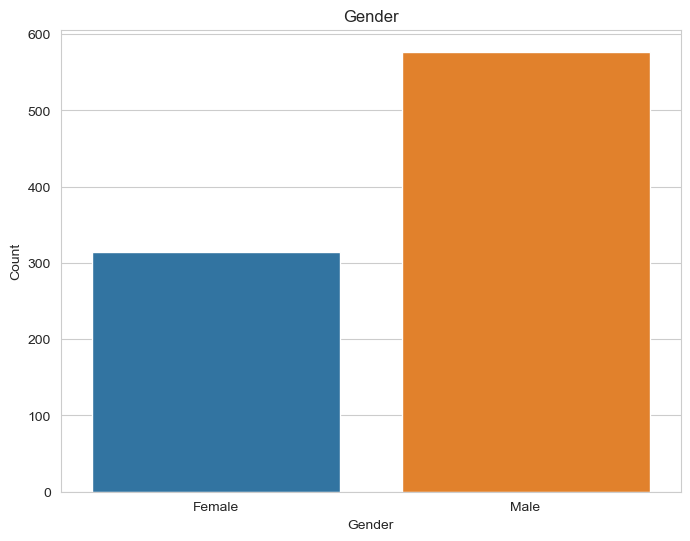

In [288]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', data=df)
plt.title('Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

### Bar chart for ticket class

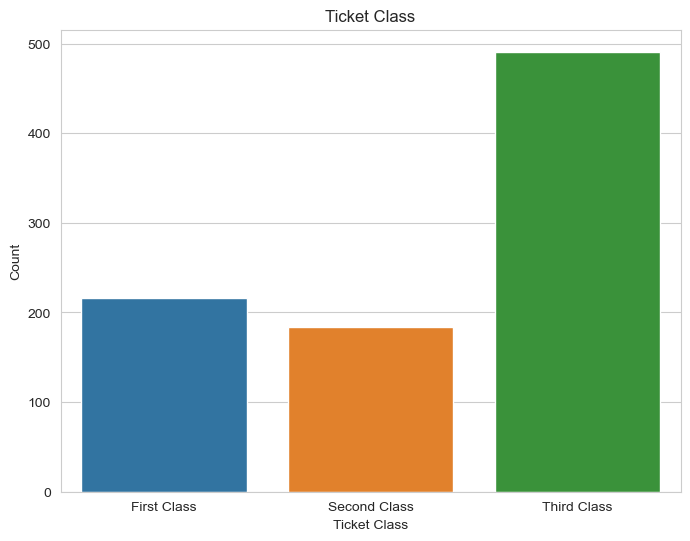

In [34]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', data=df)
plt.title('Ticket Class')
plt.xlabel('Ticket Class')
plt.ylabel('Count')
plt.show()

### Bar chart for survival status


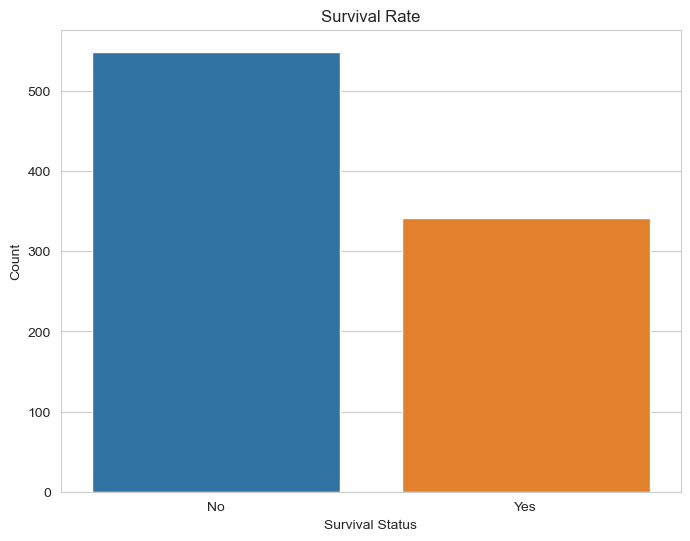

In [30]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=df)
plt.title('Survival Rate')
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.show()

## Question 2: Passengers' age analysis by ticket class and survival status

### Histogram for passengers' age

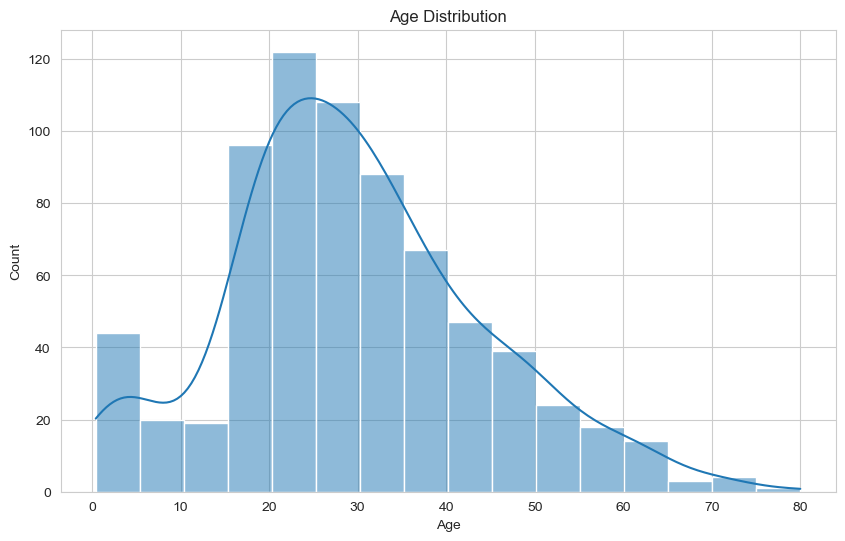

In [49]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=16, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [51]:
# Summarizing the Age column
age_summary = df['Age'].describe()

# Converting the summary to a DataFrame
age_summary_df = age_summary.reset_index()

# Renaming the columns
age_summary_df.columns = ['Statistic', 'Value']

# Printing the summary as a table
age_summary_df

,Statistic,Value
0,count,714.000000
1,mean,29.699118
2,std,14.526497
3,min,0.420000
4,25%,20.125000
5,50%,28.000000
6,75%,38.000000
7,max,80.000000


### Boxplot for age per Ticket Class

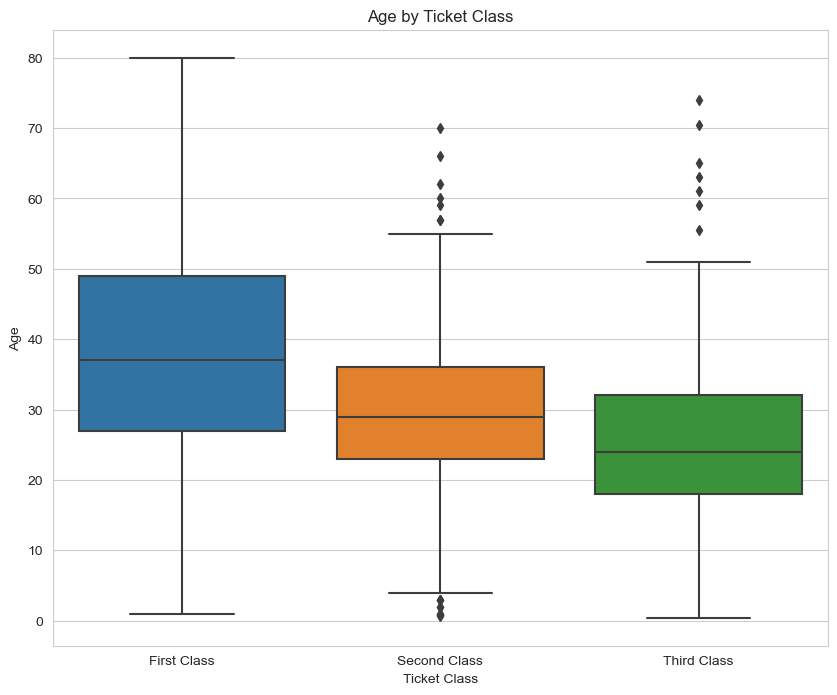

In [226]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Age by Ticket Class')
plt.xlabel('Ticket Class')
plt.ylabel('Age')
plt.show()

In [56]:
# Grouping by ticket class and summarizing age, including the number of NAs
age_ticket_class_summary = df.groupby('Pclass')['Age'].describe()
age_ticket_class_summary['Non_NAs'] = df.groupby('Pclass')['Age'].count()
age_ticket_class_summary['NAs'] = df.groupby('Pclass')['Age'].apply(lambda x: x.isnull().sum())

# Printing the summary as a table
age_ticket_class_summary

,count,mean,std,min,25%,50%,75%,max,Non_NAs,NAs
Pclass,,,,,,,,,,
First Class,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0,186,30
Second Class,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0,173,11
Third Class,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0,355,136


### Boxplot for age per Survival status

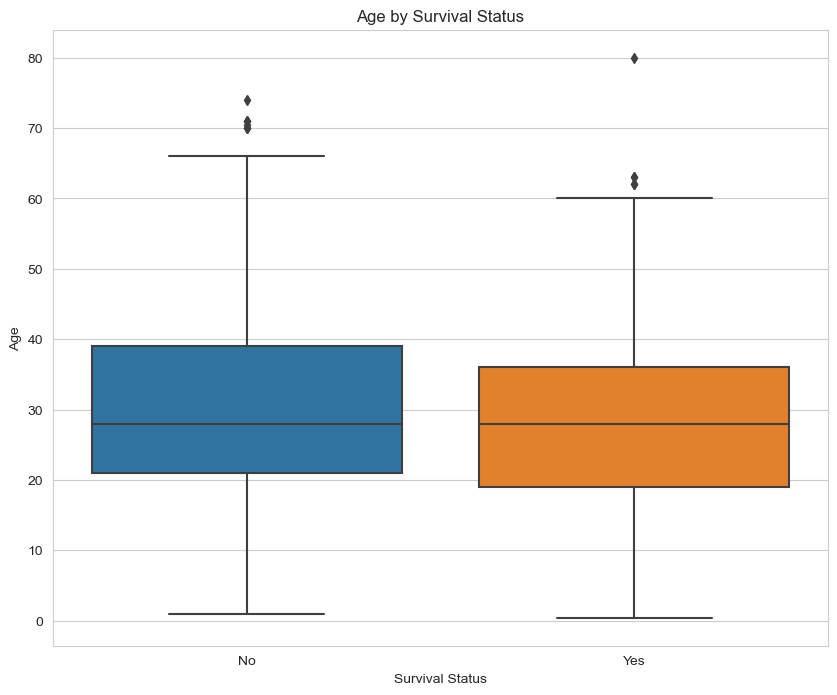

In [228]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age by Survival Status')
plt.xlabel('Survival Status')
plt.ylabel('Age')
plt.show()

In [63]:
# Grouping by survival status and summarizing age
age_survival_summary = df.groupby('Survived')['Age'].describe()
age_survival_summary['Non_NAs'] = df.groupby('Survived')['Age'].count()
age_survival_summary['NAs'] = df.groupby('Survived')['Age'].apply(lambda x: x.isnull().sum())

# Printing the summary as a table
age_survival_summary

,count,mean,std,min,25%,50%,75%,max,Non_NAs,NAs
Survived,,,,,,,,,,
No,424.0,30.626179,14.172110,1.00,21.0,28.0,39.0,74.0,424,125
Yes,290.0,28.343690,14.950952,0.42,19.0,28.0,36.0,80.0,290,52


## Question 3: Travel fares and free passengers

### Histogram for Travel Fare

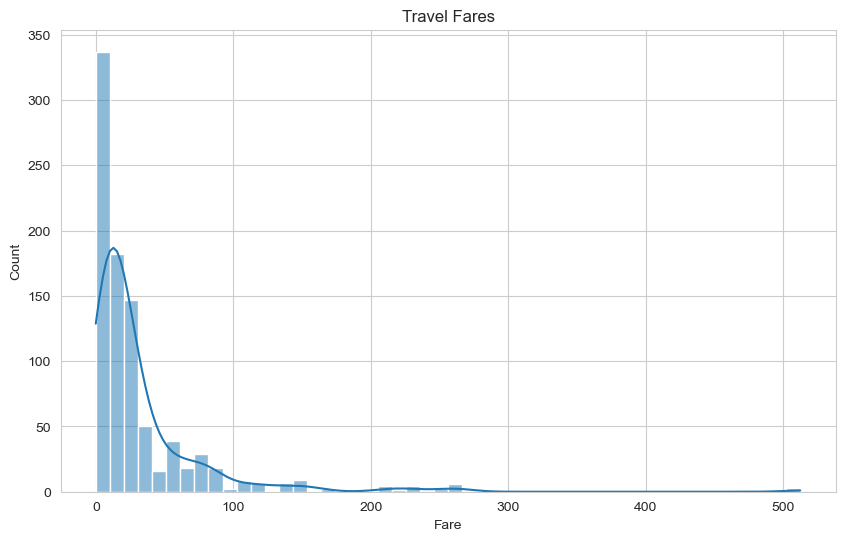

In [70]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Fare'].dropna(), bins=50, kde=True)
plt.title('Travel Fares')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

In [72]:
# Summarizing the Fare column
fare_summary = df['Fare'].describe()

# Converting the summary to a DataFrame
fare_summary_df = fare_summary.reset_index()

# Renaming the columns
fare_summary_df.columns = ['Statistic', 'Value']

# Printing the summary as a table
fare_summary_df

,Statistic,Value
0,count,891.000000
1,mean,32.204208
2,std,49.693429
3,min,0.000000
4,25%,7.910400
5,50%,14.454200
6,75%,31.000000
7,max,512.329200


### Table with passenger fare payment status

In [75]:
# Creating a column for payment status
df['Payment_Status'] = df['Fare'].apply(lambda x: 'Did Not Pay' if x == 0 else 'Did Pay')

# Summarizing the payment status
payment_summary = df['Payment_Status'].value_counts().reset_index()
payment_summary.columns = ['Payment_Status', 'Count']

# Printing the summary as a table
payment_summary

,Payment_Status,Count
0,Did Pay,876
1,Did Not Pay,15


## Question 4: Different visualizations of family size per ticket class

In [300]:
# FamilySize is the sum of siblings/spouses (SibSp), parents/children (Parch), plus one for the passenger themselves
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Summarizing each column
sibsp_summary = df['SibSp'].describe()
parch_summary = df['Parch'].describe()
familysize_summary = df['FamilySize'].describe()

# Combining the summaries into a DataFrame
combined_summary_df = pd.DataFrame({
    'Siblings/Spouses': sibsp_summary,
    'Parents/Children': parch_summary,
    'Family Size': familysize_summary
})

# Transposing the DataFrame
combined_summary_df = combined_summary_df.transpose()

# Printing the combined summary as a table
combined_summary_df

,count,mean,std,min,25%,50%,75%,max
Siblings/Spouses,891.0,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parents/Children,891.0,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Family Size,891.0,1.904602,1.613459,1.0,1.0,1.0,2.0,11.0


In [305]:
# Grouping by ticket class and describing family size
familysize_by_pclass_summary = df.groupby('Pclass')['FamilySize'].describe()

# Printing the summary as a table
familysize_by_pclass_summary

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
First Class,216.0,1.773148,1.038524,1.0,1.0,1.0,2.00,6.0
Second Class,184.0,1.782609,1.054017,1.0,1.0,1.0,2.25,6.0
Third Class,491.0,2.008147,1.953525,1.0,1.0,1.0,2.00,11.0


## Vertical boxplot

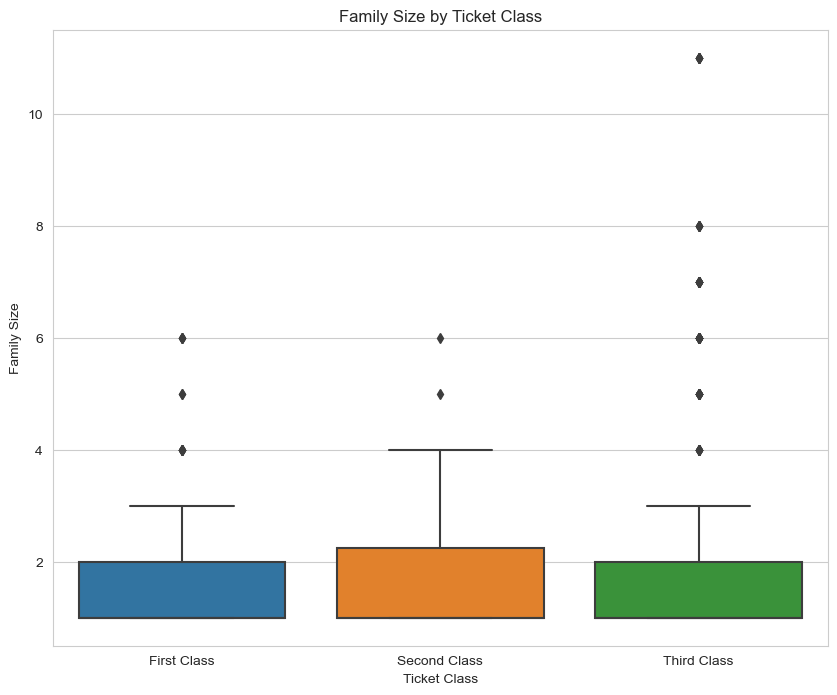

In [230]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='Pclass', y='FamilySize', data=df)
plt.title('Family Size by Ticket Class')
plt.xlabel('Ticket Class')
plt.ylabel('Family Size')
plt.show()

## Horizontal boxplot

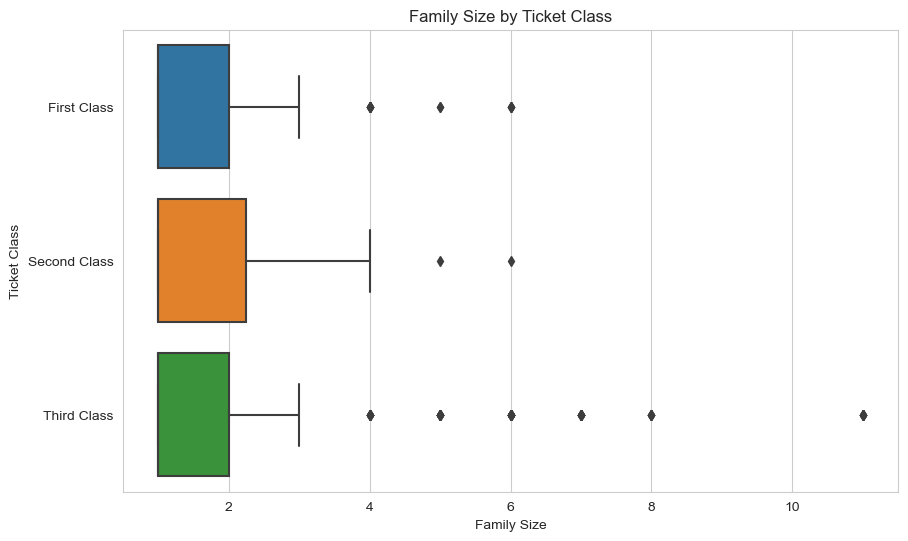

In [88]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='Pclass', x='FamilySize', data=df, orient='h')
plt.title('Family Size by Ticket Class')
plt.ylabel('Ticket Class')
plt.xlabel('Family Size')
plt.show()

## Vertical histogram

/Users/lucasrod/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


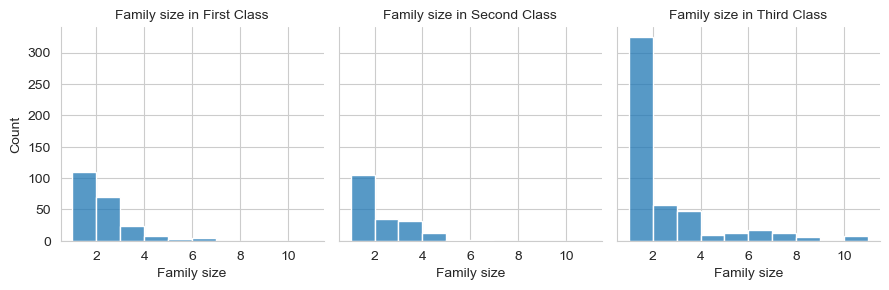

In [268]:
g = sns.FacetGrid(df, col="Pclass", height=3, aspect=1)
g.map(sns.histplot, "FamilySize", bins=range(1, 12), kde=False)
g.set_titles("Family size in {col_name}")
g.set_axis_labels("Family size", "Count")
plt.show()

## Horizontal histogram

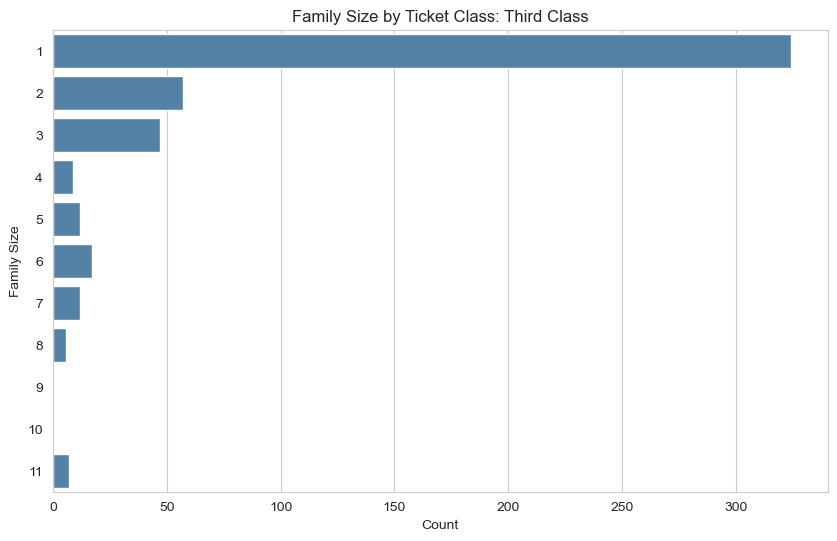

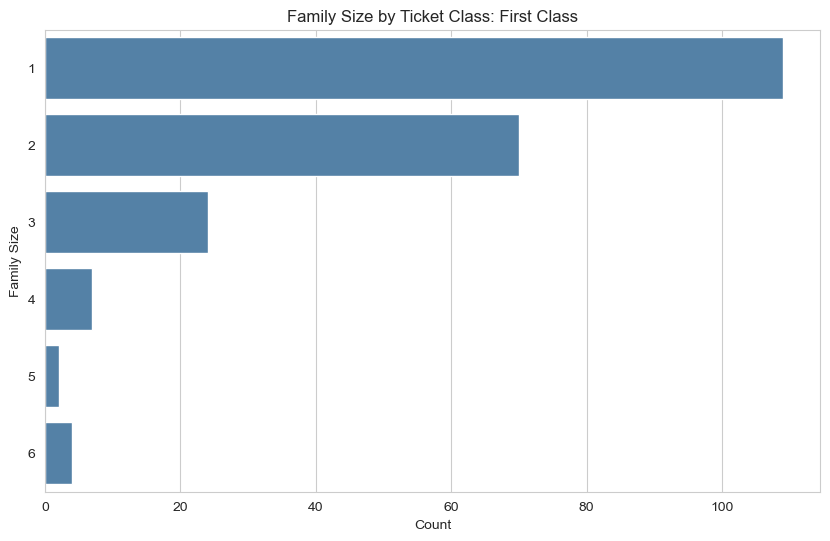

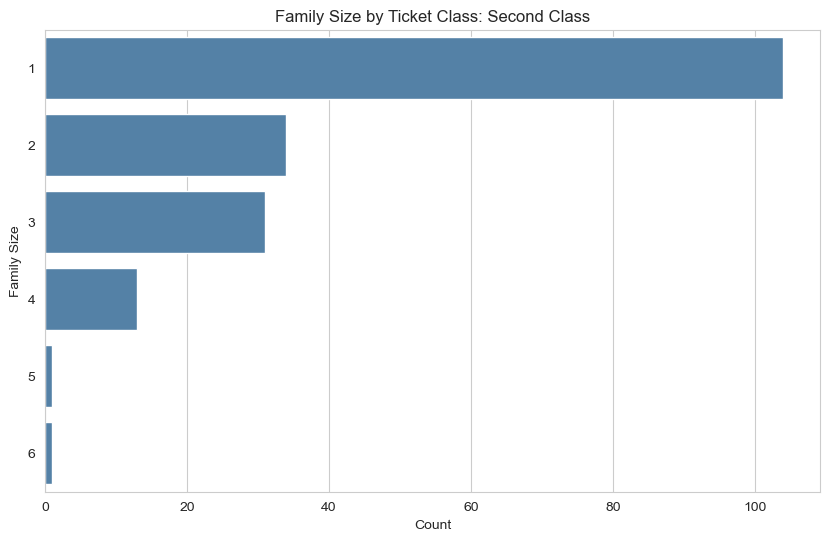

In [126]:
# In Python, horizontal histograms are not as straightforward as vertical ones.
# Instead, we use a barplot to achieve a similar effect.
for pclass in df['Pclass'].unique():
    subset = df[df['Pclass'] == pclass]
    plt.figure(figsize=(10, 6))
    sns.countplot(y='FamilySize', data=subset, order=range(1, subset['FamilySize'].max() + 1), color='steelblue')
    plt.title(f'Family Size by Ticket Class: {pclass}')
    plt.ylabel('Family Size')
    plt.xlabel('Count')
    plt.show()

## Vertical violin plot

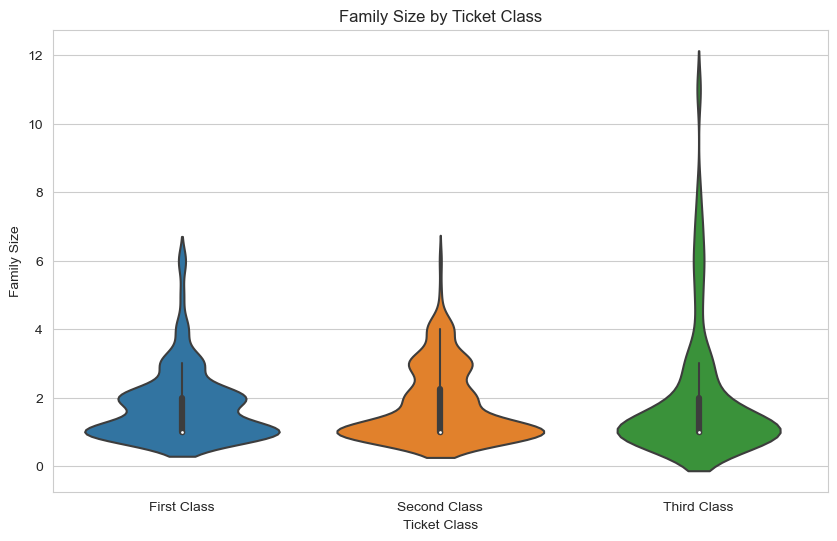

In [97]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Pclass', y='FamilySize', data=df)
plt.title('Family Size by Ticket Class')
plt.xlabel('Ticket Class')
plt.ylabel('Family Size')
plt.show()

## Horizontal violin plot

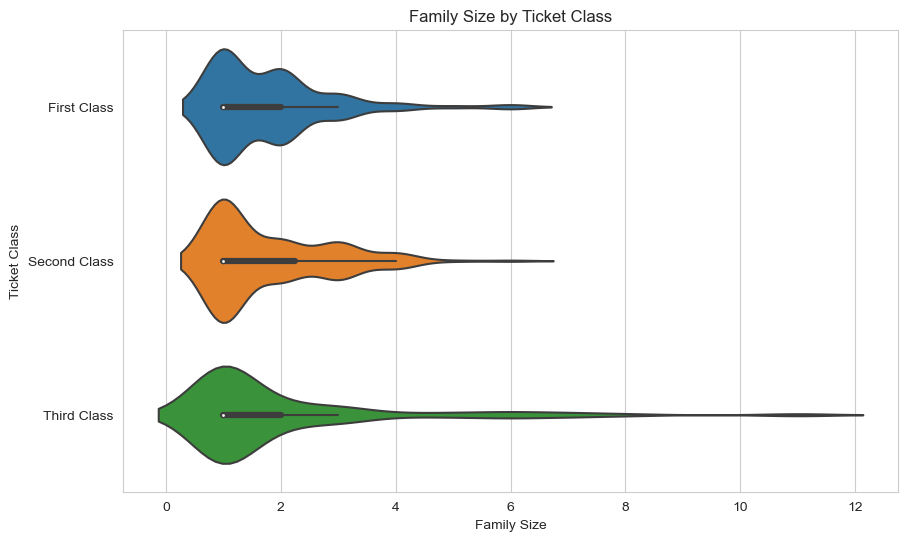

In [102]:
plt.figure(figsize=(10, 6))
sns.violinplot(y='Pclass', x='FamilySize', data=df, orient='h')
plt.title('Family Size by Ticket Class')
plt.ylabel('Ticket Class')
plt.xlabel('Family Size')
plt.show()

## Question 5: Stacked bar charts to show survival rate by age and gender

### Stacked bar chart for survival by gender

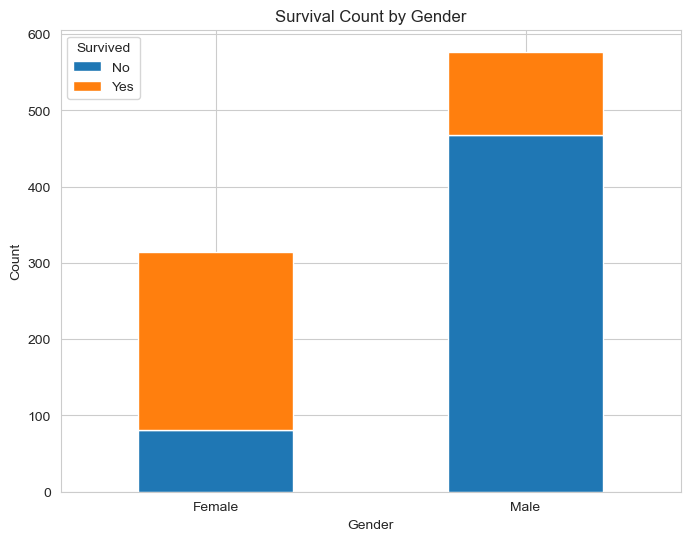

In [290]:
survival_gender = pd.crosstab(df['Sex'], df['Survived'])

survival_gender.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.legend(title='Survived')
plt.show()

In [220]:
survival_by_gender

Survived,No,Yes
Sex,,
female,81,233
male,468,109


### Stacked bar chart for survival by Ticket Class

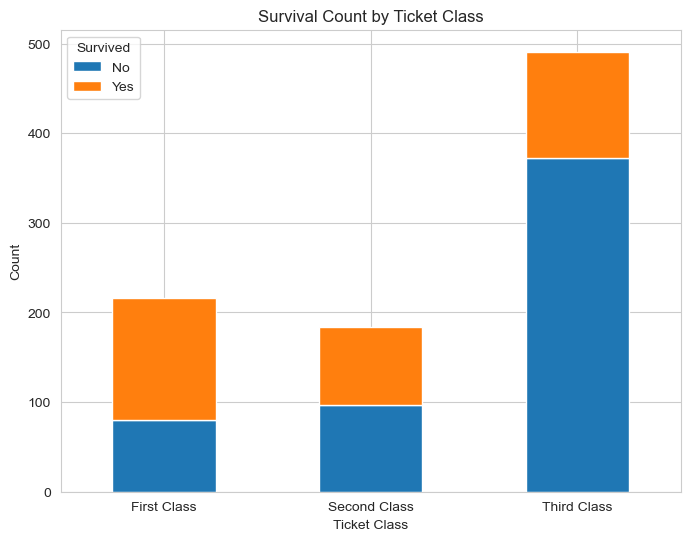

In [272]:
survival_class = pd.crosstab(df['Pclass'], df['Survived'])

survival_class.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Survival Count by Ticket Class')
plt.xlabel('Ticket Class')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.legend(title='Survived')
plt.show()

In [214]:
# Printing the table
survival_by_class

Survived,No,Yes
Pclass,,
First Class,80,136
Second Class,97,87
Third Class,372,119


## Question 6: Violin plot to show survival rate by age and gender

### Violin plot for age distribution by survival and gender

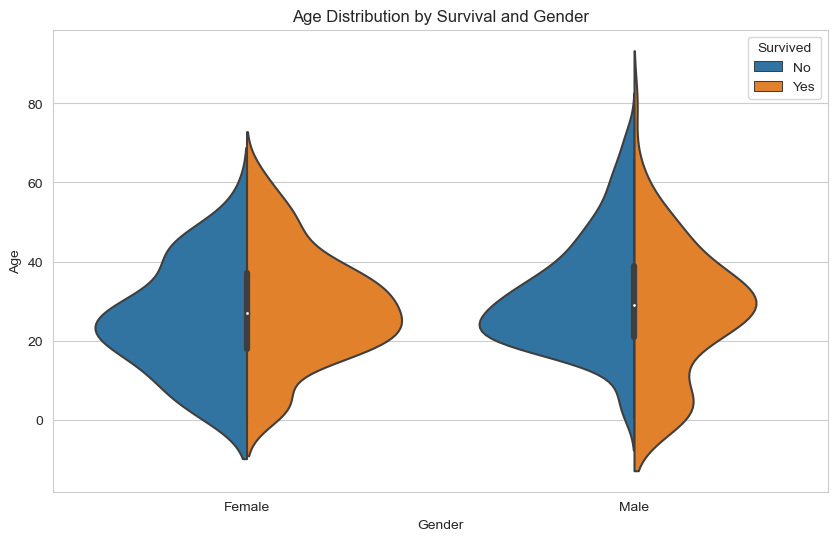

In [329]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Sex', y='Age', hue='Survived', data=df, split=True)
plt.title('Age Distribution by Survival and Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

### Summary table of age by gender and survival status

In [310]:
# Group by gender and survival, then summarize the age distribution for each group
age_summary_by_group = df.groupby(['Sex', 'Survived'])['Age'].describe()

# Printing the summary table
age_summary_by_group

count       mean        std   min    25%   50%    75%   max
Sex    Survived                                                             
Female No         64.0  25.046875  13.618591  2.00  16.75  24.5  33.25  57.0
       Yes       197.0  28.847716  14.175073  0.75  19.00  28.0  38.00  63.0
Male   No        360.0  31.618056  14.056019  1.00  21.75  29.0  39.25  74.0
       Yes        93.0  27.276022  16.504803  0.42  18.00  28.0  36.00  80.0

## Question 7: Violin plot to show survival rate by age and ticket class

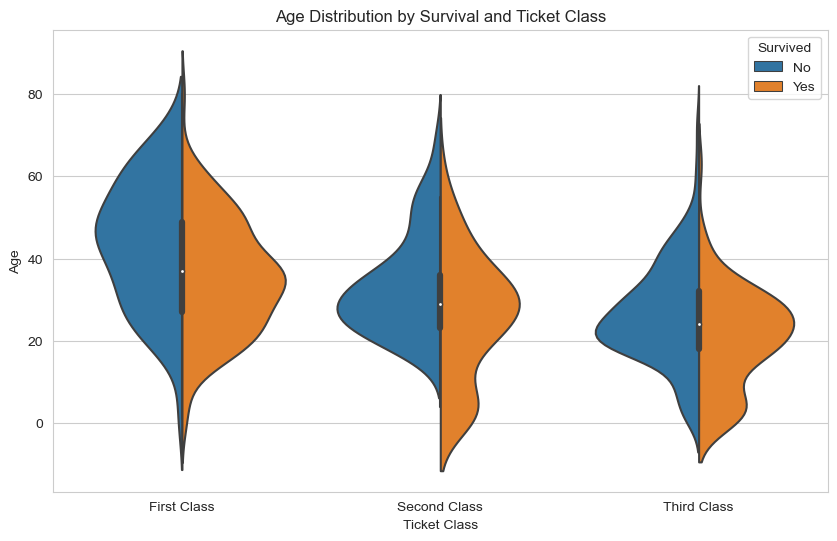

In [336]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df, split=True)
plt.title('Age Distribution by Survival and Ticket Class')
plt.xlabel('Ticket Class')
plt.ylabel('Age')
plt.show()

### Summary table of age by ticket class and survival status

In [340]:
# Group by ticket class and survival, then summarize the age distribution for each group
age_summary_by_class = df.groupby(['Pclass', 'Survived'])['Age'].describe()

# Printing the summary table
age_summary_by_class

count       mean        std    min    25%    50%  \
Pclass       Survived                                                     
First Class  No         64.0  43.695312  15.284243   2.00  31.00  45.25   
             Yes       122.0  35.368197  13.760017   0.92  24.25  35.00   
Second Class No         90.0  33.544444  12.151581  16.00  25.00  30.50   
             Yes        83.0  25.901566  14.837787   0.67  17.50  28.00   
Third Class  No        270.0  26.555556  12.334882   1.00  19.00  25.00   
             Yes        85.0  20.646118  11.995047   0.42  14.00  22.00   

                         75%   max  
Pclass       Survived               
First Class  No        55.25  71.0  
             Yes       45.00  80.0  
Second Class No        39.00  70.0  
             Yes       34.00  62.0  
Third Class  No        33.00  74.0  
             Yes       29.00  63.0